# Computer Vision Project 1

In [305]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Histogram Equalization

In [306]:
#load image
img = cv2.imread('./detective.png', cv2.IMREAD_GRAYSCALE)

In [307]:
#Defice a function that returns the pdf of the image
def create_pdf(im_in):
    pdf = np.zeros(256)
    # calculate the histogram of the image
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            pdf[im_in[i,j]] += 1
    # normalize
    # pdf = pdf/(im_in.shape[0]*im_in.shape[1])
    return pdf

In [308]:
# Define a function that returns the cdf of the pdf the image
def create_cdf(pdf):
    #cdf
    cdf = np.zeros(256)
    total = 0
    for i in range(256):
        total += pdf[i]
        cdf[i] = total
    return cdf

In [309]:
# Define the function that applies "Histogram equalization" on a given input image
def histogram_equalization(im_in):
    pdf = create_pdf(im_in)
    cdf = create_cdf(pdf)
    eq_im = np.zeros(im_in.shape)
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            eq_im[i,j] = 255*(cdf[im_in[i,j]]-cdf_min)/(cdf_max-cdf_min)
    return eq_im

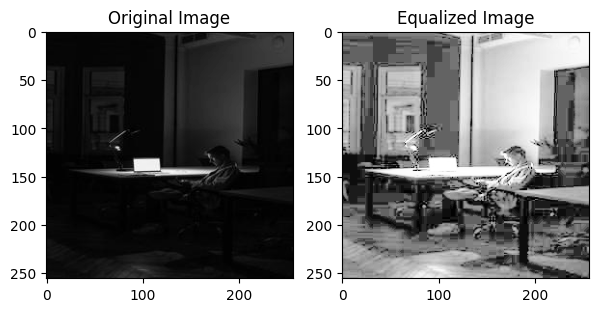

In [310]:
eq_img = histogram_equalization(img)
# Display the original image and the image after histogram equalization
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
# plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(eq_img, cmap='gray')
plt.title('Equalized Image')
# plt.axis('off')
plt.show()

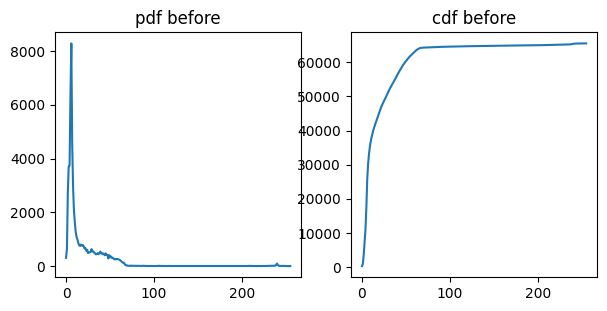

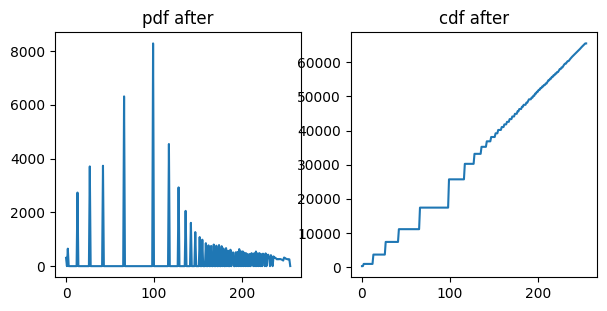

In [311]:
# Plot the pdf, cdf and image before and after histogram equalization
pdf_before = create_pdf(img)
cdf_before = create_cdf(pdf_before)
eq_img = eq_img.astype(np.uint8)
pdf_after = create_pdf(eq_img)
cdf_after = create_cdf(pdf_after)

# show the pdf, cdf and image before histogram equalization, in a line of 3 subplots
plt.figure(figsize=(7,7))
plt.subplot(221)
plt.plot(pdf_before)
plt.title('pdf before')

plt.subplot(222)
plt.plot(cdf_before)
plt.title('cdf before')
plt.show()

# show the pdf, cdf and image after histogram equalization, in a line of 3 subplots
plt.figure(figsize=(7,7))
plt.subplot(221)
plt.plot(pdf_after)
plt.title('pdf after')

plt.subplot(222)
plt.plot(cdf_after)
plt.title('cdf after')
plt.show()


- provide the comparison

## 2. mage Thresholding

In [312]:
# Load image
image_cell = cv2.imread('./TEM cell.png', cv2.IMREAD_GRAYSCALE)

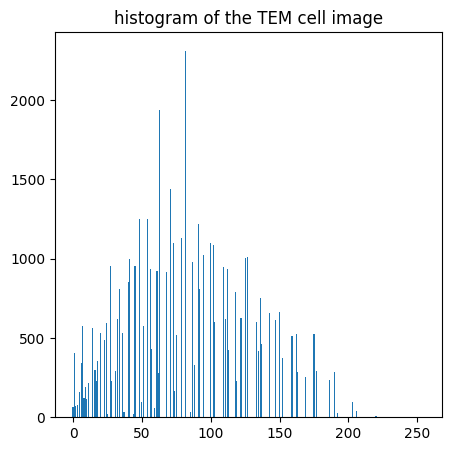

In [313]:
# Plot the histogram of the image using the functions you created for Q1
img2 = create_pdf(image_cell)
plt.figure(figsize=(5,5))
plt.bar(range(256), img2)
# plt.plot(img2)
plt.title('histogram of the TEM cell image')
plt.show()


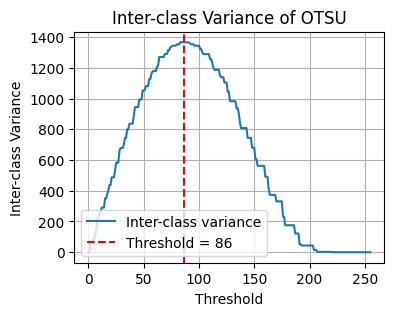

In [314]:
# Apply Otsu Thresholding and generate a plot of the inter-class variance
def otsu_thresholding(im_in):
    pdf = create_pdf(im_in)
    total_pixel = im_in.shape[0]*im_in.shape[1]
    g_max = 0
    threshold = 0
    inter_class_variance = np.zeros(256) # inter-class variance
    for i in range(256):
        n_0 = pdf[:i].sum() # foreground pixels
        n_1 = pdf[i:].sum() # background pixels
        mu_0 = 0 # mean of foreground pixels
        mu_1 = 1 # mean of background pixels
        for k in range(i):
            mu_0 += k*pdf[k]
        for k in range(i, 256):
            mu_1 += k*pdf[k]
        if n_0 == 0 or n_1 == 0:
            inter_class_variance[i] = 0
            continue

        mu_0 = mu_0/n_0
        mu_1 = mu_1/n_1
        omega_0 = n_0/total_pixel # probability of foreground pixels
        omega_1 = n_1/total_pixel # probability of background pixels
        g = omega_0*omega_1*(mu_0-mu_1)**2
        inter_class_variance[i] = g
        if g > g_max:
            g_max = g
            threshold = i
    return inter_class_variance, threshold
inter_class_variances, threshold = otsu_thresholding(image_cell)
# Plot inter-class variance as a function of threshold
plt.figure(figsize=(4,3))
plt.plot(inter_class_variances, label='Inter-class variance')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Inter-class Variance of OTSU')
plt.xlabel('Threshold')
plt.ylabel('Inter-class Variance')
plt.legend()
plt.grid(True)
plt.show()

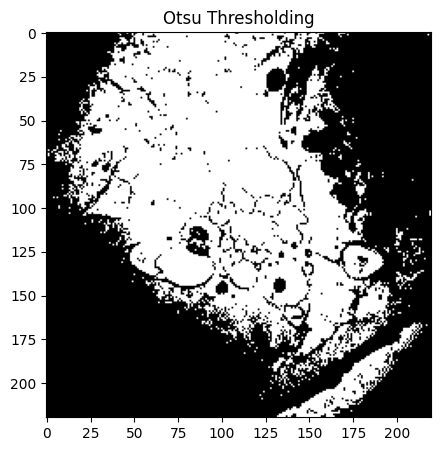

In [315]:
def otsu_thresholding_image(im_in, threshold):
    im_out = im_in.copy()
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            if im_in[i,j] > threshold:
                im_out[i,j] = 255
            else:
                im_out[i,j] = 0
    plt.figure(figsize=(5,5))
    plt.imshow(im_out, cmap='gray')
    plt.title('Otsu Thresholding')
    plt.show()
otsu_thresholding_image(image_cell, threshold)

Display the Otsu thresholded image and discuss the results

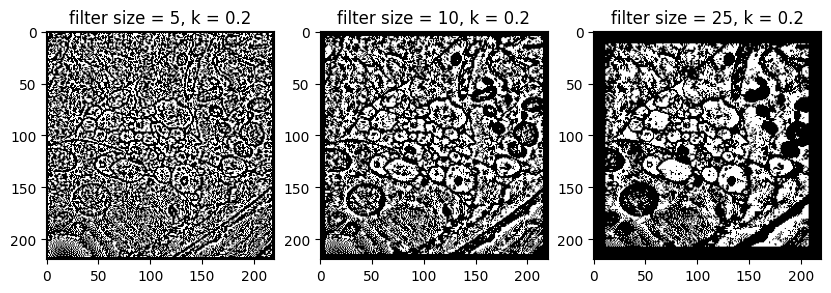

In [316]:
# Implement Niblack's Thresholding Algorithm
def niblack_thresholding(im_in, window_size, k):
    im_out = im_in.copy()
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            if i < window_size//2 or j < window_size//2 or i >= im_in.shape[0]-window_size//2 or j >= im_in.shape[1]-window_size//2:
                im_out[i,j] = 0
                continue
            window = im_in[i-window_size//2:i+window_size//2+1, j-window_size//2:j+window_size//2+1]
            mean = np.mean(window)
            std = np.std(window)
            threshold = mean + k*std
            if im_in[i,j] > threshold:
                im_out[i,j] = 255
            else:
                im_out[i,j] = 0
    return im_out
#show 3 different results of Niblack's thresholding with different filter sizes
plt.figure(figsize=(10,10))
plt.subplot(131)
im_out = niblack_thresholding(image_cell, 5, 0.2)
plt.imshow(im_out, cmap='gray')
plt.title('filter size = 5, k = 0.2')
plt.subplot(132)
im_out = niblack_thresholding(image_cell, 10, 0.2)
plt.imshow(im_out, cmap='gray')
plt.title('filter size = 10, k = 0.2')
plt.subplot(133)
im_out = niblack_thresholding(image_cell, 25, 0.2)
plt.imshow(im_out, cmap='gray')
plt.title('filter size = 25, k = 0.2')
plt.show()

Discuss the outputs of the two thresholded images based on the results you got

## 3. Template Matching

In [317]:
# Load "colored" image
main_image = cv2.imread('./snow.jpg')
template_image = cv2.imread('./snowtemp.jpg')

In [318]:
# Create a function to perform template matching
def template_matching(main_image, template_image):
    # transform the images to grayscale
    main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
    template_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
    # get the height and width of the main image and the template image
    height, width = main_image.shape
    template_height, template_width = template_image.shape
    
    # initialize the result_x, result_y, max_corr, and result_image
    result_x, result_y = 0, 0
    max_peak = 0 # maximum correlation peak
    result_image = np.zeros((height-template_height+1, width-template_width+1))
    
    # List to store coordinates and values above threshold
    coordinates_above_threshold = []
    threshold = 0.9  # Define the threshold as 60% of max_peak
    
    #template mean and std
    template_mean = np.mean(template_image)
    template_std = np.std(template_image)
    
    for i in range(height-template_height+1):
        for j in range(width-template_width+1):
            temp_window = main_image[i:i+template_height, j:j+template_width]
            temp_window_mean = np.mean(temp_window)
            temp_window_std = np.std(temp_window)
            # calculate the correlation, by using the formula in the slides
            if temp_window_std > 0 and template_std > 0:
                result_image[i,j] = np.sum((temp_window-temp_window_mean)*(template_image-template_mean))/(temp_window_std*template_std)
                if result_image[i,j] > max_peak: # find the maximum correlation peak
                    max_peak = result_image[i,j]
                    result_y = i
                    result_x = j
                 # Check if the current result is above the threshold
                if result_image[i, j] > threshold * max_peak:
                    coordinates_above_threshold.append((i, j, result_image[i, j]))
    return result_x, result_y, result_image, max_peak, coordinates_above_threshold

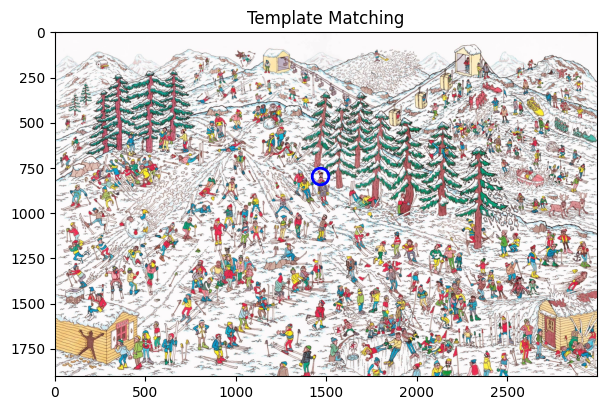

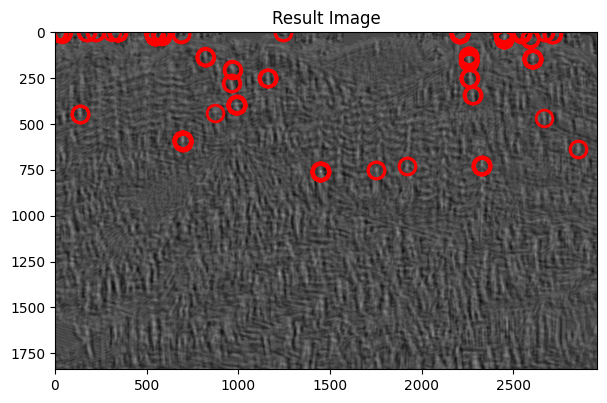

In [319]:
# Plot the output of template matching along with a thresholded output with the peak
def plot_matching_results(main_image, result_image, result_x, result_y, coordinates_above_threshold):
    # move the result point from the top-left corner to the center of the template image
    center_x, center_y = result_x + template_image.shape[1]//2, result_y + template_image.shape[0]//2
    # plot the result of template matching, with blue circle
    main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(7,7))
    plt.imshow(main_image)
    plt.plot(center_x, center_y, 'bo', markersize=12, markerfacecolor='none', markeredgewidth=2)
    plt.title('Template Matching')
    
    #the reuslt image，在上面圈出大于阈值的点
    plt.figure(figsize=(7,7))
    plt.imshow(result_image, cmap='gray')
    plt.title('Result Image')
    for i, j, value in coordinates_above_threshold:
        plt.plot(j, i, 'ro', markersize=12, markerfacecolor='none', markeredgewidth=2)
    plt.show()

    

result_x, result_y, result_image, max_peak, coordinates_above_threshold = template_matching(main_image, template_image)
# result_x, result_y = 1447, 762
plot_matching_results(main_image, result_image, result_x, result_y, coordinates_above_threshold)
